<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/chap8/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import sys
import os
folder = '/content/gdrive/My Drive/school_of_ai/chap8/'
os.chdir(folder)
print(os.getcwd()) 
for root, dirs, files in os.walk("."):
    for filename in files:
        print(filename)
sys.path.append(folder)

/content/gdrive/My Drive/school_of_ai/chap8
evaluate.py
load_data.py
train_test.py
show_images.py
trial.ipynb
model.py
load_data.cpython-36.pyc
show_images.cpython-36.pyc
train_test.cpython-36.pyc
evaluate.cpython-36.pyc
model.cpython-36.pyc
cifar-10-python.tar.gz
test_batch
data_batch_3
data_batch_2
data_batch_5
data_batch_1
data_batch_4
batches.meta
readme.html


In [0]:
%matplotlib inline
import torch
import load_data
import show_images
import model
import train_test
import evaluate

In [4]:
classes, trainloader, testloader = load_data.load()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])


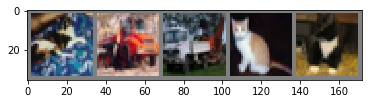

In [5]:
show_images.show_random_images(trainloader, classes)

In [6]:
import model
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = model.ResNet18()
my_model = net.to(device)
summary(my_model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(my_model.parameters(), lr=0.01, momentum=0.9)

In [8]:
EPOCHS = 26
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train_test.train(my_model, device, trainloader, optimizer, criterion, epoch)
    train_test.test(my_model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.8172605633735657 Batch_id=390 Accuracy=53.64: 100%|██████████| 391/391 [03:18<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 6303/10000 (63.03%)

EPOCH: 2


Loss=0.6796265840530396 Batch_id=390 Accuracy=73.79: 100%|██████████| 391/391 [03:19<00:00,  2.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7194/10000 (71.94%)

EPOCH: 3


Loss=0.48786574602127075 Batch_id=390 Accuracy=82.22: 100%|██████████| 391/391 [03:15<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7540/10000 (75.40%)

EPOCH: 4


Loss=0.25396761298179626 Batch_id=390 Accuracy=87.88: 100%|██████████| 391/391 [03:13<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7895/10000 (78.95%)

EPOCH: 5


Loss=0.24337109923362732 Batch_id=390 Accuracy=91.34: 100%|██████████| 391/391 [03:15<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7580/10000 (75.80%)

EPOCH: 6


Loss=0.24092154204845428 Batch_id=390 Accuracy=94.52: 100%|██████████| 391/391 [03:16<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7904/10000 (79.04%)

EPOCH: 7


Loss=0.15386267006397247 Batch_id=390 Accuracy=96.31: 100%|██████████| 391/391 [03:15<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7998/10000 (79.98%)

EPOCH: 8


Loss=0.03925350308418274 Batch_id=390 Accuracy=97.19: 100%|██████████| 391/391 [03:16<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8122/10000 (81.22%)

EPOCH: 9


Loss=0.06694665551185608 Batch_id=390 Accuracy=98.44: 100%|██████████| 391/391 [03:16<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8084/10000 (80.84%)

EPOCH: 10


Loss=0.05848796293139458 Batch_id=390 Accuracy=99.24: 100%|██████████| 391/391 [03:16<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 8112/10000 (81.12%)

EPOCH: 11


Loss=0.05679626017808914 Batch_id=390 Accuracy=99.38: 100%|██████████| 391/391 [03:16<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8318/10000 (83.18%)

EPOCH: 12


Loss=0.004295396618545055 Batch_id=390 Accuracy=99.63: 100%|██████████| 391/391 [03:16<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 8128/10000 (81.28%)

EPOCH: 13


Loss=0.0318690650165081 Batch_id=390 Accuracy=99.54: 100%|██████████| 391/391 [03:17<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 8203/10000 (82.03%)

EPOCH: 14


Loss=0.005438625812530518 Batch_id=390 Accuracy=99.80: 100%|██████████| 391/391 [03:16<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 8346/10000 (83.46%)

EPOCH: 15


Loss=0.0007918119663372636 Batch_id=390 Accuracy=99.97: 100%|██████████| 391/391 [03:16<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8425/10000 (84.25%)

EPOCH: 16


Loss=0.001611387706361711 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:17<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8475/10000 (84.75%)

EPOCH: 17


Loss=0.001111710094846785 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:17<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8505/10000 (85.05%)

EPOCH: 18


Loss=0.00023045539273880422 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:16<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8483/10000 (84.83%)

EPOCH: 19


Loss=0.00030771494493819773 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:16<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8492/10000 (84.92%)

EPOCH: 20


Loss=0.0005867481231689453 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:16<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8486/10000 (84.86%)

EPOCH: 21


Loss=0.00010346174531150609 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:17<00:00,  2.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8495/10000 (84.95%)

EPOCH: 22


Loss=7.281303260242566e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:16<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8500/10000 (85.00%)

EPOCH: 23


Loss=5.3882598876953125e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:17<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8505/10000 (85.05%)

EPOCH: 24


Loss=9.504556510364637e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:17<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8485/10000 (84.85%)

EPOCH: 25


Loss=0.0001282930315937847 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:16<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8521/10000 (85.21%)

EPOCH: 26


Loss=0.00023472309112548828 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [03:16<00:00,  2.50it/s]



Test set: Average loss: 0.0062, Accuracy: 8508/10000 (85.08%)



GroundTruth:  horse   car  frog  ship  ship
Predicted:   ship   car  frog  ship  ship


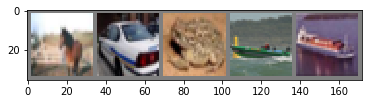

In [9]:
evaluate.show_predicted_actual(my_model, device, testloader, classes)

In [10]:
evaluate.evaluate_accuracy(my_model, device, testloader)

Accuracy of the network on the 10000 test images: 85 %


In [11]:
evaluate.evaluate_classwise_accuracy(my_model, device, classes, testloader)

Accuracy of plane : 83 %
Accuracy of   car : 94 %
Accuracy of  bird : 91 %
Accuracy of   cat : 71 %
Accuracy of  deer : 80 %
Accuracy of   dog : 78 %
Accuracy of  frog : 88 %
Accuracy of horse : 89 %
Accuracy of  ship : 77 %
Accuracy of truck : 91 %
